# Análisis de sentimientos

### Importando librerías

In [152]:
import pandas as pd

import spacy

import nltk
from nltk.corpus import stopwords
from nltk import bigrams, trigrams, ngrams
from collections import defaultdict
from string import punctuation

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Janneth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Cargando datos

In [4]:
train = pd.read_csv('../data/processed/train.csv', index_col=[0], parse_dates=['Date'], dayfirst=True)
train.head()

,Title,Opinion,Place,Gender,Age,Country,Date,Label,Lang
1390,muy bueno,"la verdad no me gustaron para nada las momias,...",Museo de las Momias,Male,63,Estados Unidos,21/07/2013,1,es
2766,más que una gran escalera,este lugar es conocido por su incríble escalin...,Universidad de Guanajuato,Female,26,México,09/07/2014,1,es
3567,tour en guanajuato,¡sorprendente! algo muy interesante de ver.. d...,Museo de las Momias,Female,20,México,13/01/2017,1,es
763,punto turístico por excelencia,este es uno de los lugares que su visita es ob...,Monumento Pípila,Male,28,México,05/09/2016,0,es
3318,esperaba más,es un lugar romántico pero esperaba u poco más...,Callejón del Beso,Female,-1,México,2019,1,es


In [5]:
val = pd.read_csv('../data/processed/val.csv', index_col=[0], parse_dates=['Date'], dayfirst=True)
val.head()

,Title,Opinion,Place,Gender,Age,Country,Date,Label,Lang
577,decepcionante,desde que llegas y el museo parece más una ter...,Museo de las Momias,Male,42,México,06/01/2015,0,es
4031,casi la catedral,cerca del jardín unión encontraras este lugar ...,Basilica Colegiata,Female,38,México,21/11/2017,1,es
2390,un edificio emblemático,un edificio que vale a pena hacerle fotos desd...,Universidad de Guanajuato,Male,53,México,09/02/2016,1,es
4290,lugar típico,"me encantó, es muy divertido, te toman foto, t...",Callejón del Beso,Female,29,México,01/10/2017,1,es
4381,arquitectura espectacular,"no te cansas de admirar tremenda arquitectura,...",Universidad de Guanajuato,Female,49,México,02/06/2015,1,es


### Separar por etiqueta (Positivos y negativos)

In [7]:
train_opiniones_positivas = train[train['Label'] == 1]['Opinion']

train_opiniones_negativas = train[train['Label'] == 0]['Opinion']

train_opiniones_positivas.shape, train_opiniones_negativas.shape

((2891,), (616,))

### Tokenización

#### Signos de puntuación

In [11]:
# Lista de signos de puntuación
from string import punctuation
punctuations = list(punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


#### Stopwords

In [153]:
stop_words = set(stopwords.words('spanish'))

#### Tokenización

In [197]:
# Tokenización con NLTK
words_train_positivas = [t for t in nltk.word_tokenize(" ".join(train_opiniones_positivas)) 
                         if t not in punctuations  # signos de puntuación
                            and t not in stop_words]   # stop words

words_train_negativas = [t for t in nltk.word_tokenize(" ".join(train_opiniones_negativas)) 
                         if t not in punctuations  # signos de puntuación
                            and t not in stop_words]   # stop words

print(words_train_positivas[:20])
print(words_train_negativas[:20])

['verdad', 'gustaron', 'momias', 'interesante', 'ver', 'descomposición', 'daba', 'cadáveres', 'ciudad', 'paguen', 'extra', 'entrar', 'ver', 'artefactos', 'tortura', 'cosas', "'sobrenaturales", 'éso', 'mejor', 'paseo']
['lugares', 'visita', 'obligatoria', 'atardeceres', 'único', 'detalle', 'lugar', 'encuentra', 'descuidado', 'monumento', 'grafiteado', 'balaustradas', 'rotas', 'famosas', 'momias', 'guanajuato', 'museo', 'horrible', 'exhiben', 'sino']


#### N-gramas

In [273]:
# Número de n-gramas
n = 2

# Crear lista de n-gramas
n_gramas_positivos = list(ngrams(words_train_positivas, n))
n_gramas_negativos = list(ngrams(words_train_negativas, n))

print(n_gramas_positivos[:10])
print(n_gramas_negativos[:10])

[('verdad', 'gustaron'), ('gustaron', 'momias'), ('momias', 'interesante'), ('interesante', 'ver'), ('ver', 'descomposición'), ('descomposición', 'daba'), ('daba', 'cadáveres'), ('cadáveres', 'ciudad'), ('ciudad', 'paguen'), ('paguen', 'extra')]
[('lugares', 'visita'), ('visita', 'obligatoria'), ('obligatoria', 'atardeceres'), ('atardeceres', 'único'), ('único', 'detalle'), ('detalle', 'lugar'), ('lugar', 'encuentra'), ('encuentra', 'descuidado'), ('descuidado', 'monumento'), ('monumento', 'grafiteado')]


#### Modelo por conteo de frecuencias

In [274]:
# Modelo de conteos de n_gramas
frec_positivos = defaultdict(int) 
frec_negativos = defaultdict(int) 

 # Conteo por frecuencia de n-gramas
for n_grama in n_gramas_positivos:
    frec_positivos[n_grama] += 1 # Aumentar el conteo 

for n_grama in n_gramas_negativos:
    frec_negativos[n_grama] += 1 # Aumentar el conteo


In [275]:
frec_positivos

defaultdict(int,
            {('verdad', 'gustaron'): 1,
             ('gustaron', 'momias'): 1,
             ('momias', 'interesante'): 3,
             ('interesante', 'ver'): 8,
             ('ver', 'descomposición'): 1,
             ('descomposición', 'daba'): 1,
             ('daba', 'cadáveres'): 1,
             ('cadáveres', 'ciudad'): 1,
             ('ciudad', 'paguen'): 1,
             ('paguen', 'extra'): 1,
             ('extra', 'entrar'): 1,
             ('entrar', 'ver'): 4,
             ('ver', 'artefactos'): 1,
             ('artefactos', 'tortura'): 1,
             ('tortura', 'cosas'): 1,
             ('cosas', "'sobrenaturales"): 1,
             ("'sobrenaturales", 'éso'): 1,
             ('éso', 'mejor'): 1,
             ('mejor', 'paseo'): 1,
             ('paseo', 'museo'): 1,
             ('museo', 'momias'): 28,
             ('momias', 'lugar'): 6,
             ('lugar', 'conocido'): 2,
             ('conocido', 'incríble'): 1,
             ('incríble', 'escalin

In [276]:
frec_negativos

defaultdict(int,
            {('lugares', 'visita'): 2,
             ('visita', 'obligatoria'): 2,
             ('obligatoria', 'atardeceres'): 1,
             ('atardeceres', 'único'): 1,
             ('único', 'detalle'): 1,
             ('detalle', 'lugar'): 1,
             ('lugar', 'encuentra'): 4,
             ('encuentra', 'descuidado'): 3,
             ('descuidado', 'monumento'): 1,
             ('monumento', 'grafiteado'): 1,
             ('grafiteado', 'balaustradas'): 1,
             ('balaustradas', 'rotas'): 1,
             ('rotas', 'famosas'): 1,
             ('famosas', 'momias'): 2,
             ('momias', 'guanajuato'): 9,
             ('guanajuato', 'museo'): 4,
             ('museo', 'horrible'): 1,
             ('horrible', 'exhiben'): 1,
             ('exhiben', 'sino'): 1,
             ('sino', 'exhiben'): 1,
             ('exhiben', 'abuelo'): 1,
             ('abuelo', 'contó'): 1,
             ('contó', 'hace'): 1,
             ('hace', '40'): 2,
            

In [294]:
# Ejemplo de conteo de frecuencias de n-gramas con un texto
n_grama = ('tiempo', 'disfrutar')

#n_grama = ('lugares', 'visita', 'obligatoria')

#n_grama = ('el', 'edificio','está', 'muy')
#n_grama = ('es', 'muy', 'lindo', 'el')
#n_grama = ('no', 'me', 'gustó', 'nada')
#n_grama = ('se', 'encuentra', 'muy', 'descuidado')

#texto = ('lugares', 'visita', 'obligatoria', 'atardeceres')
print(f'Frecuencia en positivos:',frec_positivos[n_grama])
print(f'Frecuencia en negativos:',frec_negativos[n_grama])


Frecuencia en positivos: 2
Frecuencia en negativos: 0


### Validación

In [278]:
# Evaluación de un texto
# Regresa un score donde se suman las frecuencias de los n-gramas positivos y se restan las frecuencias de los n-gramas negativos
def evaluar_texto(texto, frec_positivos, frec_negativos, n):
    score = 0

    # Tokenización con NLTK
    words = [t for t in nltk.word_tokenize(texto) if t not in punctuations]
    #print(words)

    for n_grama in ngrams(words, n):
        score += frec_positivos[n_grama]
        score -= frec_negativos[n_grama]
        #print(n_grama, "+", frec_positivos[n_grama], "-", frec_negativos[n_grama])     
    return score


# Clasificación del score
def clasificar(score):
    if score >= 0:  #Positivo
        return 1
    else:
        return 0    #Negativo


In [279]:
# Ejemplo con un texto

#texto = 'el edificio está muy bonito'
#texto = 'es muy lindo el edificio'
#texto = 'se encuentra muy descuidado'
texto = 'hay una leyenda acerca de este lugar que me parece la de\nromeo y julieta de guanajuato, no la cuento completapara \nque quieran llegar, a mi me parecio muy romantica y este\nlugar debe ser un sitio obligatorio para todas las parejas que\nvisiten guanajuato, así atraeran sus siete años de buena\nsuerte'
evaluar_texto(texto, frec_positivos, frec_negativos, n)

36

In [280]:
# Mostrar todo el texto de las columnas
pd.set_option('display.max_colwidth', 100)

In [281]:
# Copia del conjunto de validación
df_val_opiniones = val.copy()
df_val_opiniones.head()

,Title,Opinion,Place,Gender,Age,Country,Date,Label,Lang
577,decepcionante,desde que llegas y el museo parece más una terminal vieja de autobuses de pueblo de mala muerte ...,Museo de las Momias,Male,42,México,06/01/2015,0,es
4031,casi la catedral,cerca del jardín unión encontraras este lugar emblemático y su arquitectura tipo barrocon con or...,Basilica Colegiata,Female,38,México,21/11/2017,1,es
2390,un edificio emblemático,un edificio que vale a pena hacerle fotos desde el pípila y una vez abajo verla de frente y subi...,Universidad de Guanajuato,Male,53,México,09/02/2016,1,es
4290,lugar típico,"me encantó, es muy divertido, te toman foto, te dicen cómo posar para el beso, el público se ríe...",Callejón del Beso,Female,29,México,01/10/2017,1,es
4381,arquitectura espectacular,"no te cansas de admirar tremenda arquitectura, pero si de subir las escaleras para preciar la vi...",Universidad de Guanajuato,Female,49,México,02/06/2015,1,es


#### Calcular el score y hacer la clasificación

In [282]:
df_val_opiniones['Score'] = df_val_opiniones['Opinion'].apply(lambda x: evaluar_texto(x, frec_positivos, frec_negativos, n))
df_val_opiniones['Clasificación'] = df_val_opiniones['Score'].apply(clasificar)

df_val_opiniones.head()

,Title,Opinion,Place,Gender,Age,Country,Date,Label,Lang,Score,Clasificación
577,decepcionante,desde que llegas y el museo parece más una terminal vieja de autobuses de pueblo de mala muerte ...,Museo de las Momias,Male,42,México,06/01/2015,0,es,10,1
4031,casi la catedral,cerca del jardín unión encontraras este lugar emblemático y su arquitectura tipo barrocon con or...,Basilica Colegiata,Female,38,México,21/11/2017,1,es,116,1
2390,un edificio emblemático,un edificio que vale a pena hacerle fotos desde el pípila y una vez abajo verla de frente y subi...,Universidad de Guanajuato,Male,53,México,09/02/2016,1,es,1,1
4290,lugar típico,"me encantó, es muy divertido, te toman foto, te dicen cómo posar para el beso, el público se ríe...",Callejón del Beso,Female,29,México,01/10/2017,1,es,18,1
4381,arquitectura espectacular,"no te cansas de admirar tremenda arquitectura, pero si de subir las escaleras para preciar la vi...",Universidad de Guanajuato,Female,49,México,02/06/2015,1,es,1,1


In [283]:
# Evaluar el modelo con F1 Score
from sklearn.metrics import f1_score

f1_score = f1_score(df_val_opiniones['Label'], df_val_opiniones['Clasificación'])

print(f'F1 Score:', f1_score)

F1 Score: 0.9080532656943564


### Análisis de los resultados

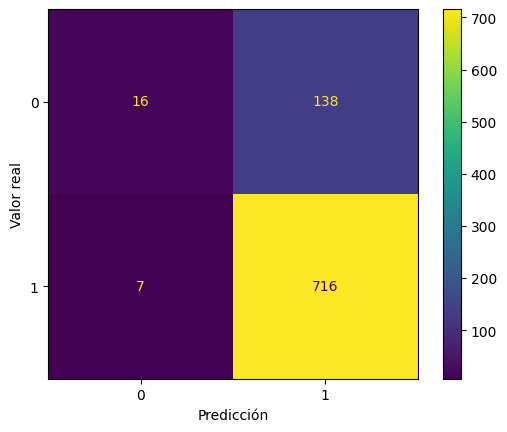

In [284]:
# Plot matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(df_val_opiniones['Label'], df_val_opiniones['Clasificación'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



In [285]:
from sklearn.metrics import classification_report

print(classification_report(df_val_opiniones['Label'], df_val_opiniones['Clasificación']))

              precision    recall  f1-score   support

           0       0.70      0.10      0.18       154
           1       0.84      0.99      0.91       723

    accuracy                           0.83       877
   macro avg       0.77      0.55      0.54       877
weighted avg       0.81      0.83      0.78       877



In [286]:
df_val_opiniones['Clasificación'].value_counts()

Clasificación
1    854
0     23
Name: count, dtype: int64

In [287]:
# Verdaderos positivos y Verdaderos negativos
df_val_opiniones['Label'].value_counts()

Label
1    723
0    154
Name: count, dtype: int64

In [288]:
# Mostrar todo el texto de las columnas
pd.set_option('display.max_colwidth', None)

In [289]:
# Falsos positivos
df_val_opiniones[(df_val_opiniones['Label'] == 0) & (df_val_opiniones['Clasificación'] == 1)][['Title', 'Opinion', 'Place', 'Label','Score', 'Clasificación']]

,Title,Opinion,Place,Label,Score,Clasificación
577,decepcionante,"desde que llegas y el museo parece más una terminal vieja de autobuses de pueblo de mala muerte que un museo, sabes que la experiencia no será buena. en época vacacional no es raro tardar más de 2 horas en la fila para entrar al museo que consiste de unas 6 salas aproximadamente, mal ventiladas, pequeñas y en donde resulta difícil tan solo caminar de la cantidad de gente que hay. definitivamente es algo deplorable y cuando sales te sientes decepcionado de lo que pagaste y del tiempo que esperaste. la experiencia de visitar un museo en guanajuato lleno de 'momias' podría ser algo grandioso y memorable, pero este intento de museo definitivamente deja en mal la imagen de guanajuato. conclusión: a menos que en verdad no puedan vivir sin haber visto una momia de cerca (ojo: no se pueden tocar), definitivamente recomiendo visitar otras atracciones de la ciudad y no este sitio.",Museo de las Momias,0,10,1
27,es más viejo que las momias,"en condiciones mediocres, demasiado personal para lo que es, igual el precio, solo vengan si no conocen las momias y por lo iconico que son para la ciudad pero necesitan una renovación urgenteeeeeeeeeeee.",Museo de las Momias,0,0,1
35,¡historia!,"escultura importante que se encuentra sobre una de las colinas, se dice que el pípila vigila hoy la cuidad. un lugar con historia.",Monumento Pípila,0,0,1
569,realismo mágico,"hay una leyenda acerca de este lugar que me parece la de\nromeo y julieta de guanajuato, no la cuento completapara \nque quieran llegar, a mi me parecio muy romantica y este\nlugar debe ser un sitio obligatorio para todas las parejas que\nvisiten guanajuato, así atraeran sus siete años de buena\nsuerte",Callejón del Beso,0,36,1
92,para saber de la infancia del afamado muralista,"se trata de la casa paterna de diego rivera, adaptada como museo. da una idea de la vida de diego en la infancia. en realidad hay más elementos de arte de otros artistas que del mismo diego.",Casa de Diego Rivera,0,88,1
...,...,...,...,...,...,...
657,morbo,"un lugar interesante y diferente pero con mucho morbo, no considero que sea el mejor atractivo de guanajuato como lo pintan.",Museo de las Momias,0,5,1
408,momificado,"para mí gusto no vale la pena... tristemente es un gran atractivo pero descuidado, complicado para llegar y caótico... las momias empolvadas y mal tenidas según mi impresión. no recomiendo gastar el tiempo allí habiendo cosas más llamativas. a menos que la administración del lugar mejoren las condiciones.",Museo de las Momias,0,3,1
603,"nada extraordinario (tal vez la historia-leyenda), pero sin duda hay que conocerlo","no hay forma de recorrer las calles de guanajuato y no llegar al callejón del beso. la historia es buena, pero el lugar no es algo extraordinario. en un día concurrido, tomarse una fotografía resulta casi en un 'beso grupal'…",Callejón del Beso,0,0,1
457,paciencia. parada\nobligada,"el callejón es una parada obligada en ""guanajuato"". necesitas\npaciencia, pues hay fila para tomarse la foto.\nsi quieres foto en el balcón, cobran $30 pesos por persona \npues los balcones son privados. si la foto sólo es en los \nescalones, no hay que pagar.",Callejón del Beso,0,52,1


In [290]:
# Falsos negativos
df_val_opiniones[(df_val_opiniones['Label'] == 1) & (df_val_opiniones['Clasificación'] == 0)][['Title', 'Opinion', 'Place', 'Label','Score', 'Clasificación']]

,Title,Opinion,Place,Label,Score,Clasificación
2444,lo más llamativo de la ciudad,"a la entrada hay un guía que te cuenta la historia y te da todos los datos del sitio, luego sólo debes darle una propina, es mejor tomarlo pues esta autorizado por el museo. el sitio es interesante y te hace reflexionar sobre la vida y la muerte.",Museo de las Momias,1,-1,0
2863,interesante,"los cuerpos conservados son una atracción natural de guanajuato, son pocos los lugares que cuentan con algo así.",Museo de las Momias,1,-2,0
2963,museo,por fuera se ve extraño y la verdad tampoco entramos porque eran días festivos. fue una lástima no conocerlo se veía interesante.,Alhóndiga,1,-1,0
4250,peraba mas,"tenía una expectativa más lata del lugar, pero lamentablemente tiene muy pocas obras del artista. tiene obras de otras pérsonas",Casa de Diego Rivera,1,-1,0
3941,impresionante,"aún no entiendo porque se llama de 'museo de las momias' si lo que vemos alli son cadáveres, así mismo, cadáveres de personas a las cuales pretendieron exumar y las encontraron en 'buen estado', hay cadáveres que conservan sus dientes, cabellos, uñas. a pesar de ser cadáveres te va a gustar visitar esto.",Museo de las Momias,1,-2,0
1195,las mejores tortas de guanajuato,"si bien el mercado es sencillo en sus puestos, nunca olvidare las exquisitas tortas que alli comi. nada de restaurantes ni fondas, si estas en guanajuato ve a comer al mercado. no te arrepentiras.",Mercado Hidalgo,1,-1,0
946,bonito y divertido recorrido con las callejoneadas,visitamos este lugar en el recorrido de una callejoneada con las serenatas de la estudiantina. tuvimos la suerte de que nos tocó poca gente y esto hizo el recorrido agradable y divertido. es una manera de conocer los rinconcitos interesantes que tiene guanajuato.,Callejón del Beso,1,-1,0
